# introdução

- As implementações da rede neural pode ser encontrada no mesmo repositório que esse notebook.
- [link para o desáfio](https://www.kaggle.com/competitions/santander-customer-transaction-prediction/overview)


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


from src.model import Layer, NeuralNetwork, np

### EDA

In [2]:
df = pd.read_csv("train.csv")
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


### Plotar os Z-Score para identificar outliers

In [4]:
featues = df[df.columns[2:]]

df_zscore = (featues - featues.mean()) / featues.std()

In [6]:
def plot_top_outlier_features(z_scores_df, threshold=3):
    # Calculate the number of outliers for each feature
    outlier_counts = (z_scores_df > threshold).sum(axis=0)

    # Sort features by outlier count (descending) and select top 10
    top_outlier_features = (
        outlier_counts.sort_values(ascending=False).head(20).index.tolist()
    )

    # Iterate through top features and plot their distribution
    fig, axes = plt.subplots(5, 5, figsize=(15, 6))  # Adjust figsize as needed

    for i, feature in enumerate(top_outlier_features):
        z_scores_df[feature].hist(ax=axes.flat[i])
        axes.flat[i].set_title(f"Z-scores ({feature})")
        axes.flat[i].set_xlabel("Z-score")
        axes.flat[i].set_ylabel("Count")

    # Hide extra axes if less than 10 features
    for ax in axes.flat[len(top_outlier_features) :]:
        ax.axis("off")

    fig.suptitle(
        f"Distribuição dos Z-scores para as 20 Features com mais Outliers (|z| > {threshold})"
    )
    plt.tight_layout()
    plt.show()

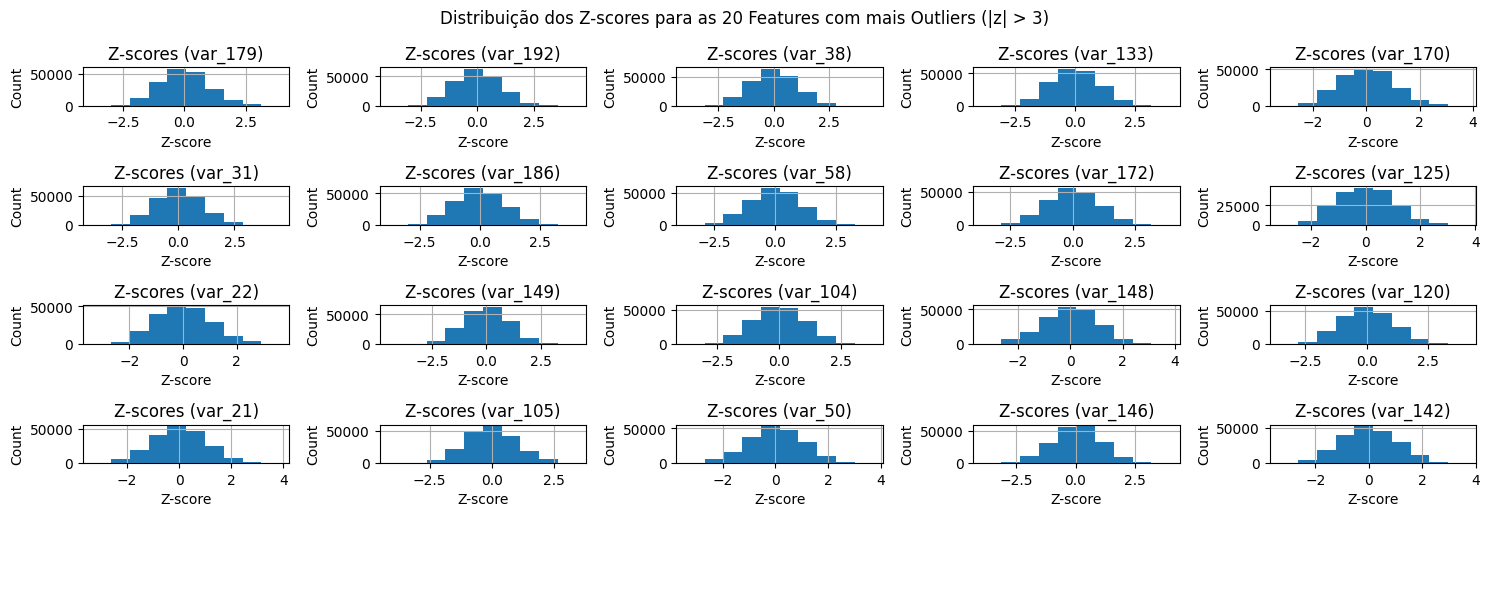

In [7]:
plot_top_outlier_features(df_zscore)

### Model


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1:2].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
)

In [42]:
layers = [
    Layer(X.shape[1], 128, "relu"),
    Layer(128, 64, "relu"),
    Layer(64, 8, "relu"),
    Layer(8, 1, "sigmoid"),
]

model = NeuralNetwork(layers, epochs=1000)

In [43]:
model.fit(X_train, y_train)